### SparklyRGT Template: choiceRGT

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder (current working directory) 

**Getting started: Please make a copy of this (sparklyRGT_template_4) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation (ex. template_4 uses section 1 and 4) 
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
os.chdir('C:\\Users\\dexte\\sparklyRGT\\sparklyRGT_tutorial')
import sparklyRGT as rgt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

In [2]:
%load_ext autoreload
%autoreload 2 #deletable cell 

***

# 1) Load data into Python



In [3]:
file_names = ['Free S33-37 Raw.xlsx'] 
df = rgt.load_data(file_names)
df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H4,Rew_Persev_H5,Lever_Latency,Uncued_Chosen,Cued_Chosen,Choice_Omit
0,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,1.0,...,0,0,0,0,0,0,6.97,1,0,0
1,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,2.0,...,0,0,0,0,0,0,2.78,0,1,0
2,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,3.0,...,0,0,0,0,0,0,2.29,0,1,0
3,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.1,...,1,5,0,0,0,0,5.48,0,1,0
4,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.0,...,0,0,0,0,0,0,1.30,0,1,0


# 4) Choice rGT

Set your variables!

In [4]:
#for plotting: 
title = 'Choice rGT' 

startsess = 33 #first session you would like to include in figures
endsess = 37 #last session you would like to include in figures

In [5]:
#This cell is optional if you want to split by group

males = [1,2,3,4,5] #rats 1 to 5

females = [6,7,8,9,10] #rats 6 to 10
#
#

group_names = {0: 'males',
              1: 'females'} 

group_list = [males,females]

## Data cleaning

In [6]:
rgt.check_sessions(df)

Subject  StartDate  Session
1        05/23/21   33          80.0
         05/24/21   34          83.0
         05/25/21   35          85.0
         05/26/21   36          78.0
         05/27/21   37          75.0
2        05/23/21   33         104.0
         05/24/21   34         103.0
         05/25/21   35          87.0
         05/26/21   36          66.0
         05/27/21   37          92.0
3        05/23/21   33         107.0
         05/24/21   34          97.0
         05/25/21   35          98.0
         05/26/21   36         104.1
         05/27/21   37         108.0
4        05/23/21   33         101.0
         05/24/21   34          93.0
         05/25/21   35          94.0
         05/26/21   36          93.1
         05/27/21   37          91.0
5        05/23/21   33          83.0
         05/24/21   34          59.0
         05/25/21   35          52.1
         05/26/21   36          67.1
         05/27/21   37          66.0
6        05/23/21   33          78.0
         0

In [7]:
# df2 = rgt.drop_sessions(df, [28])
# df2 = rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all") 

## Data processing

### Calculate variables for each rat


In [8]:
df_sum = rgt.get_summary_data(df, task = 'choiceRGT') #use df instead of df2 if you didn't do any session editing, v.v.
df_sum 

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,...,prem_uncued35,prem_cued36,prem_uncued36,prem_cued37,prem_uncued37,pref33,pref34,pref35,pref36,pref37
1,22.9508,8.19672,68.8525,0,42.8571,0,42.8571,14.2857,24.1935,3.22581,...,0.000000,30.000000,10.000000,6.250000,0.000000,90.909091,86.746988,89.534884,88.888889,87.671233
2,11.2676,88.7324,0,0,10,90,0,0,22.5806,74.1935,...,33.333333,11.363636,11.764706,11.267606,12.500000,87.356322,71.000000,74.468085,72.131148,89.873418
3,18.1818,81.8182,0,0,10.7143,85.7143,3.57143,0,8.33333,83.3333,...,17.500000,21.212121,13.235294,13.636364,11.538462,28.421053,19.565217,22.330097,32.673267,22.000000
4,57.6923,0,42.3077,0,86.3636,4.54545,9.09091,0,41.5385,10.7692,...,28.125000,11.111111,15.789474,7.575758,12.121212,71.093750,68.750000,70.370370,81.000000,66.666667
5,25,75,0,0,39.5349,60.4651,0,0,25,75,...,0.000000,11.111111,5.000000,0.000000,12.765957,15.789474,23.076923,17.647059,18.367347,17.543860
6,8.77193,29.8246,38.5965,22.807,0,57.8947,42.1053,0,10.2041,34.6939,...,10.810811,14.285714,17.948718,21.153846,11.111111,75.609756,61.445783,59.340659,58.947368,59.090909
7,0,1.81818,98.1818,0,0,0,100,0,1.81818,0,...,20.000000,3.508772,12.500000,3.174603,50.000000,87.692308,89.062500,92.647059,87.692308,88.732394
8,15.5844,57.1429,15.5844,11.6883,21.4286,50,21.4286,7.14286,30.137,39.726,...,5.555556,15.068493,6.250000,18.666667,14.285714,84.848485,84.536082,80.851064,82.022472,78.125000
9,21.6667,25,48.3333,5,37.5,62.5,0,0,0,97.6744,...,25.000000,8.510638,24.000000,11.926606,23.076923,86.956522,91.150442,86.554622,78.991597,89.344262
10,0.990099,98.0198,0.990099,0,0,100,0,0,0,100,...,28.571429,35.245902,43.478261,20.661157,23.529412,88.800000,80.740741,89.552239,84.137931,87.681159


In [12]:
df_long = rgt.get_long_summary_data(df, df_sum, task = 'choiceRGT')
df_long.columns

Index(['Subject', 'Session', 'P1_C', 'P2_C', 'P3_C', 'P4_C', 'P1_U', 'P2_U',
       'P3_U', 'P4_U', 'risk_cued', 'risk_uncued', 'co_lat_cued',
       'co_lat_uncued', 'ch_lat_cued', 'ch_lat_uncued', 'cued_lev_lat',
       'uncued_lev_lat', 'cued_omit', 'uncued_omit', 'lev_omit', 'trial_init',
       'prem_cued', 'prem_uncued', 'pref'],
      dtype='object')

In [15]:
df_long.columns[2:25]

Index(['P1_C', 'P2_C', 'P3_C', 'P4_C', 'P1_U', 'P2_U', 'P3_U', 'P4_U',
       'risk_cued', 'risk_uncued', 'co_lat_cued', 'co_lat_uncued',
       'ch_lat_cued', 'ch_lat_uncued', 'cued_lev_lat', 'uncued_lev_lat',
       'cued_omit', 'uncued_omit', 'lev_omit', 'trial_init', 'prem_cued',
       'prem_uncued', 'pref'],
      dtype='object')

In [14]:
pd.set_option('display.max_columns', None)
df_sum.head()

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,34P3_C,34P4_C,34P1_U,34P2_U,34P3_U,34P4_U,35P1_C,35P2_C,35P3_C,35P4_C,35P1_U,35P2_U,35P3_U,35P4_U,36P1_C,36P2_C,36P3_C,36P4_C,36P1_U,36P2_U,36P3_U,36P4_U,37P1_C,37P2_C,37P3_C,37P4_C,37P1_U,37P2_U,37P3_U,37P4_U,risk_cued_33,risk_cued_34,risk_cued_35,risk_cued_36,risk_cued_37,risk_uncued_33,risk_uncued_34,risk_uncued_35,risk_uncued_36,risk_uncued_37,co_lat_cued_33,co_lat_uncued_33,co_lat_cued_34,co_lat_uncued_34,co_lat_cued_35,co_lat_uncued_35,co_lat_cued_36,co_lat_uncued_36,co_lat_cued_37,co_lat_uncued_37,ch_lat_cued_33,ch_lat_uncued_33,ch_lat_cued_34,ch_lat_uncued_34,ch_lat_cued_35,ch_lat_uncued_35,ch_lat_cued_36,ch_lat_uncued_36,ch_lat_cued_37,ch_lat_uncued_37,cued_lev_lat33,uncued_lev_lat33,cued_lev_lat34,uncued_lev_lat34,cued_lev_lat35,uncued_lev_lat35,cued_lev_lat36,uncued_lev_lat36,cued_lev_lat37,uncued_lev_lat37,cued_omit_33,uncued_omit_33,lev_omit33,cued_omit_34,uncued_omit_34,lev_omit34,cued_omit_35,uncued_omit_35,lev_omit35,cued_omit_36,uncued_omit_36,lev_omit36,cued_omit_37,uncued_omit_37,lev_omit37,trial_init33,trial_init34,trial_init35,trial_init36,trial_init37,prem_cued_33,prem_uncued_33,prem_cued_34,prem_uncued_34,prem_cued_35,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37
1,22.9508,8.19672,68.8525,0,42.8571,0,42.8571,14.2857,24.1935,3.22581,72.5806,0,50,10,40,0,30.1587,1.5873,68.254,0,55.5556,0,44.4444,0,25,5.35714,69.6429,0,55.5556,0,44.4444,0,5,0,93.3333,1.66667,22.2222,0,77.7778,0,-37.7049,-45.1613,-36.5079,-39.2857,-90,-14.2857,20,11.1111,11.1111,-55.5556,0.973947,1.056667,1.184054,1.342500,1.156154,1.021667,1.098286,0.928571,1.040313,0.974000,1.099508,1.242857,1.272742,1.119000,1.113333,0.886667,1.393929,0.893333,1.516833,1.443333,2.561250,4.135000,2.714583,2.193636,2.494675,2.676667,2.547875,2.361000,2.988750,1.216667,0.000000,0.000000,12.000000,1.388889,0.000000,10.752688,1.298701,0.000000,12.244898,0.000000,0.000000,12.621359,0.000000,0.000000,7.594937,100,93,98,103,79,23.750000,12.500000,12.500000,9.090909,16.883117,0.000000,30.000000,10.000000,6.250000,0.000000,90.909091,86.746988,89.534884,88.888889,87.671233
2,11.2676,88.7324,0,0,10,90,0,0,22.5806,74.1935,3.22581,0,23.0769,76.9231,0,0,12.7273,83.6364,1.81818,1.81818,37.5,62.5,0,0,2.63158,94.7368,2.63158,0,20,80,0,0,18.3333,78.3333,3.33333,0,14.2857,85.7143,0,0,100,93.5484,92.7273,94.7368,93.3333,100,100,100,100,100,1.532881,4.083333,1.886600,1.382381,1.318837,1.332143,1.261613,1.598462,2.307000,1.207500,1.862535,2.325000,1.630161,1.005769,1.932000,1.130625,1.265789,0.408667,1.922833,1.297143,3.258553,5.544545,2.563380,4.927931,2.281286,3.802500,3.032727,4.422941,3.471268,4.667500,5.263158,0.000000,17.924528,7.042254,3.448276,8.256881,5.714286,0.000000,11.320755,2.272727,0.000000,16.438356,4.225352,0.000000,21.782178,106,109,106,73,101,1.315789,9.090909,5.633803,6.896552,15.714286,33.333333,11.363636,11.764706,11.267606,12.500000,87.356322,71.000000,74.468085,72.131148,89.873418
3,18.1818,81.8182,0,0,10.7143,85.7143,3.57143,0,8.33333,83.3333,0,8.33333,16.6667,80.303,1.51515,1.51515,10,85,5,0,11.1111,82.5397,6.34921,0,15.3846,65.3846,19.2308,0,17.2414,75.8621,1.72414,5.17241,21.0526,78.9474,0,0,11.7647,85.2941,2.94118,0,100,83.3333,90,61.5385,100,92.8571,93.9394,87.3016,86.2069,94.1176,1.071667,1.207333,0.938889,1.569811,1.167368,3.405745,1.086667,2.469792,1.095882,0.974528,1.741818,0.975357,1.949167,1.164394,1.584000,0.972222,1.044615,1.280690,1.642632,0.888088,3.851481,3.449118,3.610556,3.851757,2.714348,3.408000,3.903636,2.759853,2.260000,4.098462,0.000000,1.470588,22.764228,0.000000,0.000000,17.117117,0.000000,3.750000,10.434783,0.000000,1.470588,15.833333,0.000000,1.282051,16.666667,123,111,115,120,120,18.518519,16.176471,33.333333,10.810811,13.043478,17.500000,21.212121,13.235294,13.636364,11.538462,28.421053,19.565217,22.330097,32.673267,22.000000
4,57.6923,0,42.3077,0,86.3636,4.54545,9.09091,0,41.5385,10.7692,46.1538

In [20]:
os.chdir('C:\\Users\\dexte\\sparklyRGT\\sparklyRGT_tutorial\\inactive_files')
import sparklyRGT_test as rgt
%load_ext autoreload
%autoreload 2
df_sum, risky, optimal = rgt.get_risk_status(df_sum, startsess, endsess, task = 'choiceRGT')

print(df_sum[['mean_risk','risk_status']]) 
print(risky, optimal) 

I am being executed!
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
     mean_risk  risk_status
1   -49.731972          2.0
2    94.869167          1.0
3    86.974359          1.0
4    -3.336032          2.0
5   100.000000          1.0
6   -17.674070          2.0
7   -93.789992          2.0
8    43.273358          1.0
9    76.427308          1.0
10   97.303423          1.0
11   -8.463311          2.0
12   -9.540518          2.0
13   99.200000          1.0
14   72.771485          1.0
15   90.223286          1.0
16  -26.101010          2.0
17  -74.071584          2.0
18  100.000000          1.0
19   31.180124          1.0
20   78.996265          1.0
21  -87.576583          2.0
22   96.363636          1.0
23  -60.591568          2.0
24   10.115374          1.0
25  -42.491061          2.0
26   98.039125          1.0
27  -92.837838          2.0
28   89.591001          1.0
29   25.682088          1.0
30  -94.871981          2.0
31  -42.500000         

[autoreload of sparklyRGT failed: Traceback (most recent call last):
  File "C:\Users\dexte\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\dexte\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\dexte\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\dexte\anaconda3\lib\importlib\__init__.py", line 168, in reload
    raise ModuleNotFoundError(f"spec not found for the module {name!r}", name=name)
ModuleNotFoundError: spec not found for the module 'sparklyRGT'
]


### Export your data to an Excel file 


In [9]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = 'sex', new_file_name = 'compare_access2.xlsx', asin = False)
df_sum.to_excel("test_file_name.xlsx")
# make sure new_file_name is a string that ends in .xlsx

## Calculate means and SEMs for your experimental groups

Note: there must be at least 3 subjects in each group in group_list

In [21]:
# mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names) #run this code to group by groups assigned to group_list
# mean_scores

mean_scores, SEM = rgt.get_means_sem(df_sum) #run this code to bypass group_list, will run analysis for all rats 
mean_scores

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,34P3_C,34P4_C,34P1_U,34P2_U,34P3_U,34P4_U,35P1_C,35P2_C,35P3_C,35P4_C,35P1_U,35P2_U,35P3_U,35P4_U,36P1_C,36P2_C,36P3_C,36P4_C,36P1_U,36P2_U,36P3_U,36P4_U,37P1_C,37P2_C,37P3_C,37P4_C,37P1_U,37P2_U,37P3_U,37P4_U,risk_cued_33,risk_cued_34,risk_cued_35,risk_cued_36,risk_cued_37,risk_uncued_33,risk_uncued_34,risk_uncued_35,risk_uncued_36,risk_uncued_37,co_lat_cued_33,co_lat_uncued_33,co_lat_cued_34,co_lat_uncued_34,co_lat_cued_35,co_lat_uncued_35,co_lat_cued_36,co_lat_uncued_36,co_lat_cued_37,co_lat_uncued_37,ch_lat_cued_33,ch_lat_uncued_33,ch_lat_cued_34,ch_lat_uncued_34,ch_lat_cued_35,ch_lat_uncued_35,ch_lat_cued_36,ch_lat_uncued_36,ch_lat_cued_37,ch_lat_uncued_37,cued_lev_lat33,uncued_lev_lat33,cued_lev_lat34,uncued_lev_lat34,cued_lev_lat35,uncued_lev_lat35,cued_lev_lat36,uncued_lev_lat36,cued_lev_lat37,uncued_lev_lat37,cued_omit_33,uncued_omit_33,lev_omit33,cued_omit_34,uncued_omit_34,lev_omit34,cued_omit_35,uncued_omit_35,lev_omit35,cued_omit_36,uncued_omit_36,lev_omit36,cued_omit_37,uncued_omit_37,lev_omit37,trial_init33,trial_init34,trial_init35,trial_init36,trial_init37,prem_cued_33,prem_uncued_33,prem_cued_34,prem_uncued_34,prem_cued_35,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37,mean_risk,risk_status
All rats,9.43543,49.329,28.7436,12.492,12.0038,50.5828,24.6526,9.63579,9.21668,50.4143,27.7192,12.6498,10.0086,52.0245,28.5612,9.40574,9.17963,49.624,26.74,14.4563,10.6669,50.6055,26.3079,9.29462,8.63415,50.0805,27.5296,13.7557,9.18465,49.6147,27.2291,10.8466,8.75154,47.8812,27.7203,15.6469,7.46109,54.5254,27.7122,10.3013,17.5288,19.262,17.6074,17.4294,13.2655,28.2983,24.0662,25.6699,20.7236,23.9729,1.16291,1.78096,1.28782,1.60424,1.16247,1.53763,1.24006,3.90889,1.1424,1.44197,1.30773,1.36875,1.32428,1.24174,1.1705,1.23356,1.20219,1.26408,1.27601,1.20871,3.28821,3.08139,3.16711,2.77254,3.03281,2.87123,3.01534,2.92181,2.9981,2.75846,1.47558,2.63699,7.36634,2.14473,2.95935,11.0292,1.8964,1.88789,7.99866,1.96018,1.66936,7.66914,2.08863,1.98733,7.20852,102.406,97.75,103,96.125,99,16.7238,9.97104,12.5142,10.5334,17.5737,13.5574,14.7074,12.8034,14.8795,13.4702,63.3633,61.7211,66.2253,64.6269,65.5589,17.0186,1.46875


### Calculate means and SEMS for your experimental groups, split by risk status and/or sex

In [22]:
control_risky = [subject for subject in control_group if subject in risky]
exp_risky = [subject for subject in exp_group if subject in risky]

control_optimal = [subject for subject in control_group if subject in optimal]
exp_optimal = [subject for subject in exp_group if subject in optimal]

group_list_risk = [control_risky,exp_risky, control_optimal, exp_optimal]

#make sure the group names are in the same order as the group list!
group_names_risk = {0:'Control risky', 
                    1: 'Experimental risky',
                    2: 'Control optimal',
                    3: 'Experimental optimal'}

mean_scores_risk, SEM_risk = rgt.get_means_sem(df_sum, group_list_risk, group_names_risk)

mean_scores_risk

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,34P3_C,34P4_C,34P1_U,34P2_U,34P3_U,34P4_U,35P1_C,35P2_C,35P3_C,35P4_C,35P1_U,35P2_U,35P3_U,35P4_U,36P1_C,36P2_C,36P3_C,36P4_C,36P1_U,36P2_U,36P3_U,36P4_U,37P1_C,37P2_C,37P3_C,37P4_C,37P1_U,37P2_U,37P3_U,37P4_U,risk_cued_33,risk_cued_34,risk_cued_35,risk_cued_36,risk_cued_37,risk_uncued_33,risk_uncued_34,risk_uncued_35,risk_uncued_36,risk_uncued_37,co_lat_cued_33,co_lat_uncued_33,co_lat_cued_34,co_lat_uncued_34,co_lat_cued_35,co_lat_uncued_35,co_lat_cued_36,co_lat_uncued_36,co_lat_cued_37,co_lat_uncued_37,ch_lat_cued_33,ch_lat_uncued_33,ch_lat_cued_34,ch_lat_uncued_34,ch_lat_cued_35,ch_lat_uncued_35,ch_lat_cued_36,ch_lat_uncued_36,ch_lat_cued_37,ch_lat_uncued_37,cued_lev_lat33,uncued_lev_lat33,cued_lev_lat34,uncued_lev_lat34,cued_lev_lat35,uncued_lev_lat35,cued_lev_lat36,uncued_lev_lat36,cued_lev_lat37,uncued_lev_lat37,cued_omit_33,uncued_omit_33,lev_omit33,cued_omit_34,uncued_omit_34,lev_omit34,cued_omit_35,uncued_omit_35,lev_omit35,cued_omit_36,uncued_omit_36,lev_omit36,cued_omit_37,uncued_omit_37,lev_omit37,trial_init33,trial_init34,trial_init35,trial_init36,trial_init37,prem_cued_33,prem_uncued_33,prem_cued_34,prem_uncued_34,prem_cued_35,prem_uncued_35,prem_cued_36,prem_uncued_36,prem_cued_37,prem_uncued_37,pref33,pref34,pref35,pref36,pref37,mean_risk,risk_status
Control risky,40.3216,4.09836,55.5801,0,64.6104,2.27273,25.974,7.14286,32.866,6.99752,59.3672,0.769231,39.5833,15.4167,42.9167,2.08333,39.3441,2.26424,56.9211,1.47059,47.343,6.52174,46.1353,0,30.8099,4.79125,62.9904,1.40845,46.5278,15.625,34.7222,3.125,21.3525,0.819672,75.3552,2.47268,23.6111,3.57143,72.8175,0,-11.1602,-20.273,-16.7834,-28.7978,-55.6557,33.7662,10,7.72947,24.3056,-45.6349,0.945787,1.07745,1.03112,1.14572,1.03504,0.949833,0.96758,1.04747,0.936656,1.26437,0.937895,0.971429,1.01176,0.903458,0.947696,0.728551,1.09041,0.794167,1.26038,1.13756,2.06057,3.50304,2.12853,2.59553,1.99872,3.06771,2.12955,3.46129,2.08642,2.38258,0,0,6.3876,0.694444,0,7.10048,0.649351,0,7.4738,0.617284,0,8.23376,0,1.51515,4.29747,114.5,104.5,104.5,103.5,89.5,19.0179,26.5203,14.0422,20.2597,13.7047,14.0625,20.5556,12.8947,6.91288,6.06061,81.0014,77.7485,79.9526,84.9444,77.1689,-26.534,2
Experimental risky,4.38596,15.8214,68.3892,11.4035,0,28.9474,71.0526,0,6.01113,17.3469,68.4787,8.16327,5,23.3333,70,1.66667,4.25655,18.1818,65.0616,12.5,1.51515,31.8182,62.1212,4.54545,6.22824,16.8665,64.1393,12.766,4.6875,28.125,62.5,4.6875,6.11755,15.4538,69.4722,8.95642,4.6875,28.125,60.9375,6.25,-59.5853,-53.2839,-55.1233,-53.8104,-56.8573,-42.1053,-43.3333,-33.3333,-34.375,-34.375,0.951881,0.93375,0.94381,0.888095,0.882449,0.907381,0.873418,11.9318,0.910952,0.940833,1.67728,1.70746,1.41913,1.31383,1.23583,1.09788,1.01689,1.34333,1.1455,1.05922,3.4929,2.46762,3.14213,3.94092,3.1396,3.53484,3.27379,3.12353,3.1088,3.54403,1.68364,12.5,5.46352,0,0,16.3449,0,10,9.09996,0,0,7.01006,0,0,6.13553,77.5,87.5,87,85.5,84.5,4.103,2.5,3.71517,10.2679,12.4339,15.4054,8.89724,15.2244,12.1642,30.5556,81.651,75.2541,75.9939,73.3198,73.9117,-55.732,2
Control optimal,14.7247,85.2753,0,0,10.3571,87.8571,1.78571,0,15.457,78.7634,1.6129,4.16667,19.8718,78.6131,0.757576,0.757576,11.3636,84.3182,3.40909,0.909091,24.3056,72.5198,3.1746,0,9.0081,80.0607,10.9312,0,18.6207,77.931,0.862069,2.58621,19.693,78.6404,1.66667,0,13.0252,85.5042,1.47059,0,100,88.4409,91.3636,78.1377,96.6667,96.4286,96.9697,93.6508,93.1034,97.0588,1.30227,2.64533,1.41274,1.4761,1.2431,2.36894,1.17414,2.03413,1.70144,1.09101,1.80218,1.65018,1.78966,1.08508,1.758,1.05142,1.1552,0.844678,1.78273,1.09262,3.55502,4.49683,3.08697,4.38984,2.49782,3.60525,3.46818,3.5914,2.86563,4.38298,2.63158,0.735294,20.3444,3.52113,1.72414,12.687,2.85714,1.875,10.8778,1.13636,0.735294,16.1358,2.11268,0.641026,19.2244,114.5,110,110.5,96.5,110.5,9.91715,12.6337,19.4836,8.85368,14.3789,25.4167,16.2879,12.5,12.452,12.0192,57.8887,45.2826,48.3991,52.4022,55.9367,90.9218,1
Experimental optimal,15.8103,63.7

## Plotting

Refer to documentation in section 2B for the rest of this notebook

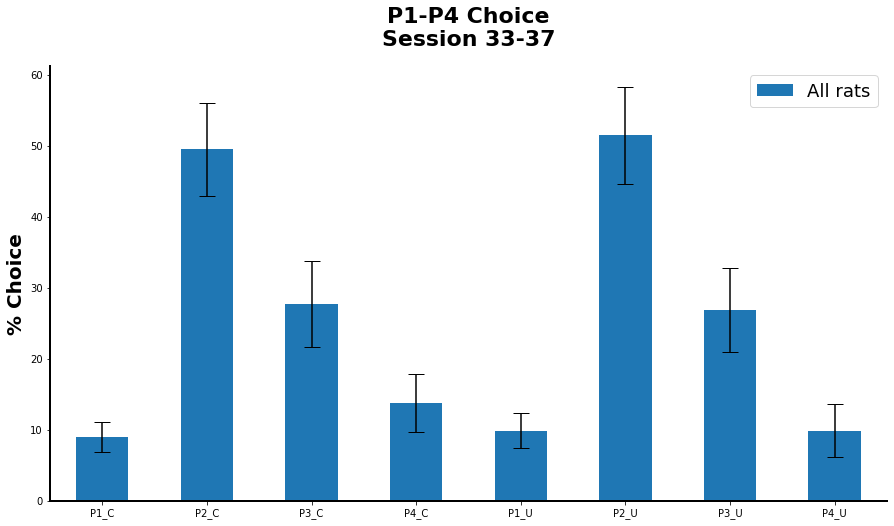

In [23]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM, task = 'choiceRGT')

#to save this figure (or any other figure):
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

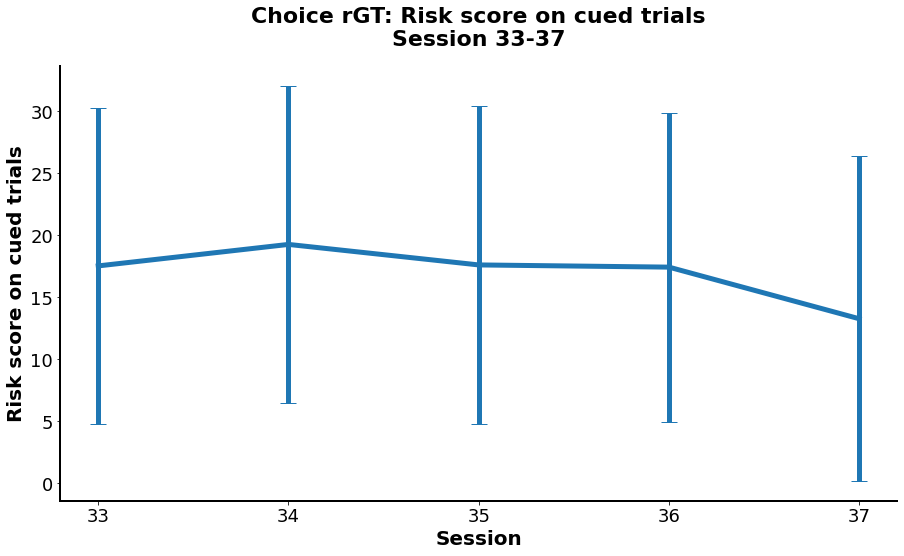

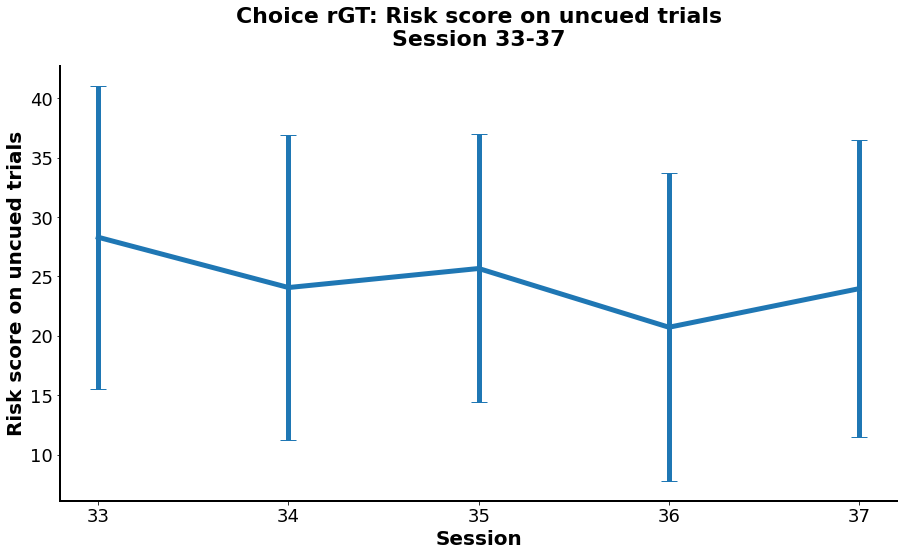

In [24]:
rgt.rgt_plot('risk_cued_', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score on cued trials') 
rgt.rgt_plot('risk_uncued_', startsess, endsess, title, mean_scores, SEM, y_label = 'Risk score on uncued trials') 

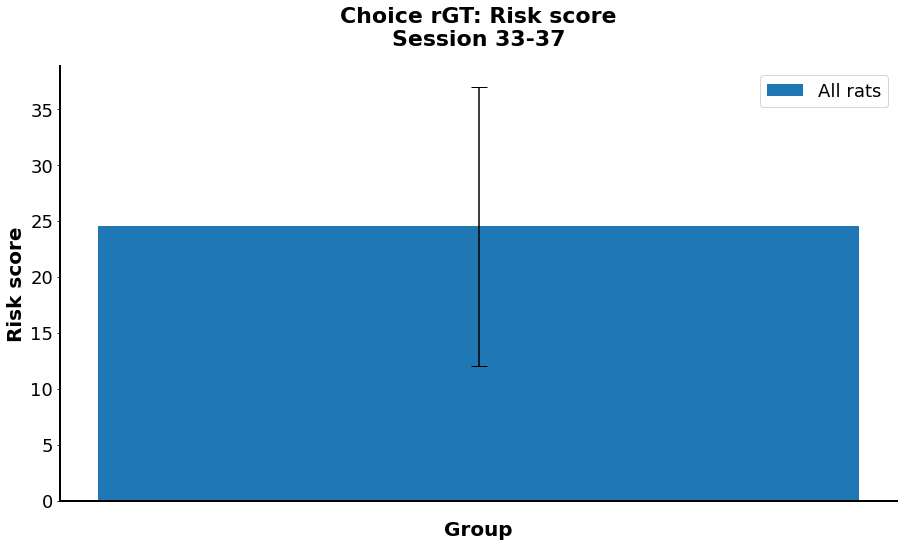

In [25]:
rgt.rgt_bar_plot('risk_uncued_', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score') #changeable to 'risk_cued_'

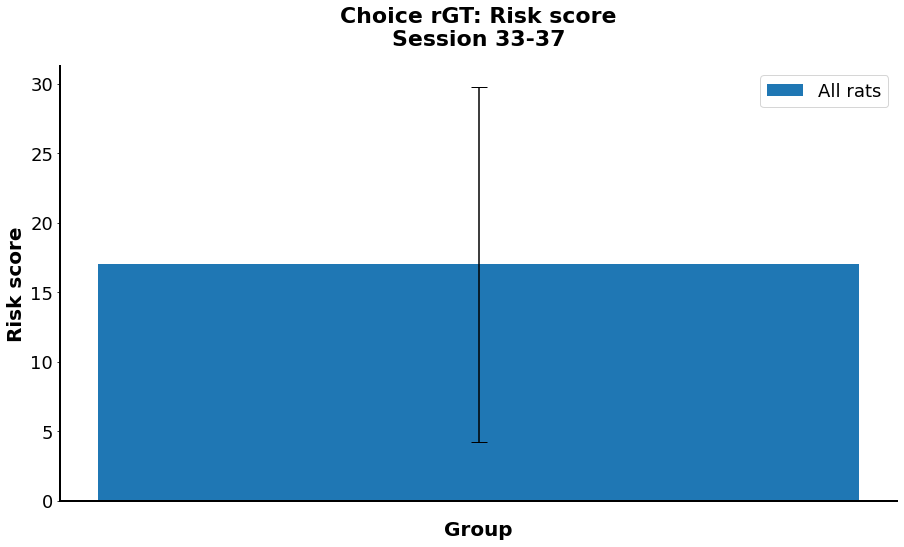

In [26]:
rgt.rgt_bar_plot('risk_cued_', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'Risk score') #changeable to 'risk_cued_'

## Plotting by risk status

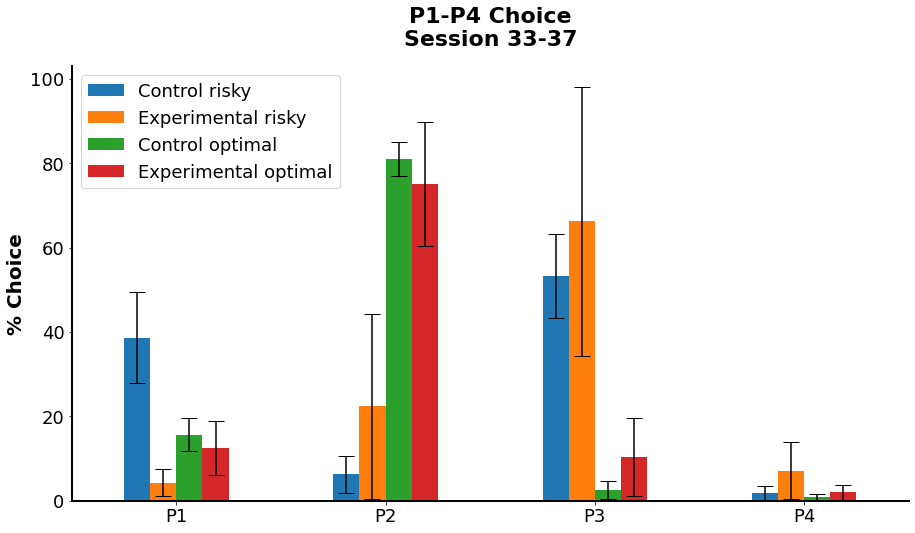

In [27]:
rgt.choice_bar_plot(startsess, endsess, mean_scores_risk, SEM_risk)

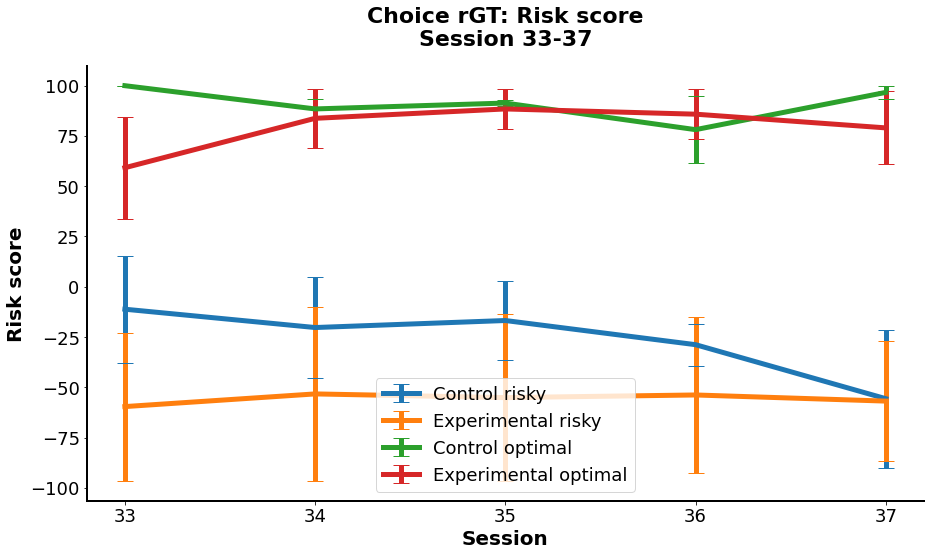

In [29]:
rgt.rgt_plot('risk_cued_', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk, y_label = 'Risk score') 

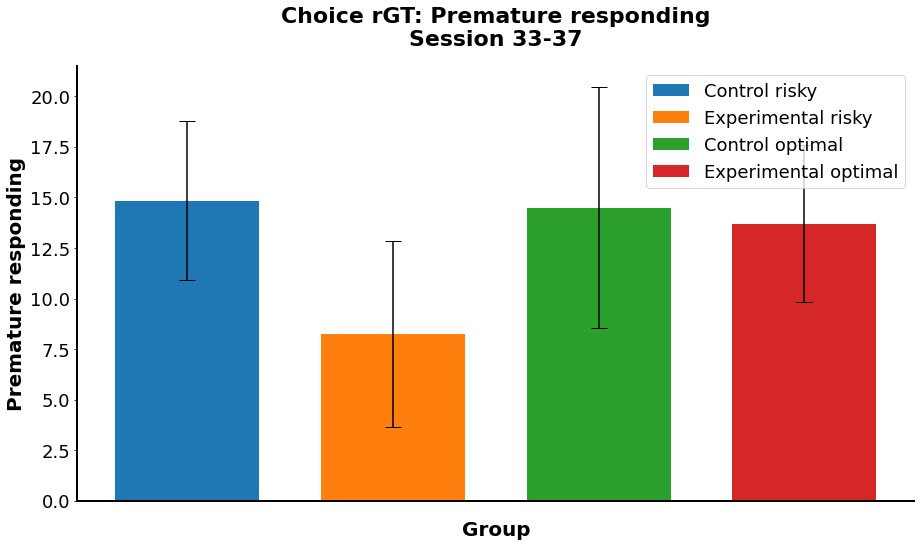

In [30]:
rgt.rgt_bar_plot('prem_cued_', startsess, endsess, title, mean_scores_risk, SEM_risk, group_names = group_names_risk,y_label = 'Premature responding')